# Density and Spice 

We measure temperature and salinity in the ocean. However, we usually think of ocean circulation in terms of density surface and tracers that are stirred along these surfaces. This is because the transport processes along and across these surface are very different, and so are the time scales of the variability present in them. 

The **vertical structure of density**, which is a function of temperature and salinity (and pressure, but that dependence is often removed by considering potential density) is relatively well studied, in the context of internal waves and small scale vertical mixing. E.g. of papers using Argo floats are: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL053196 or https://www.nature.com/articles/s41561-018-0213-6. The methods section of the first of these two articles might be worth considering for our own work. 
Also see the Vlaidou paper : https://hackmd.io/J9R9Qx9CSRa1CAL09HFLSg . Even the GM spectra makes prediction about the vertical density structure (I think -2 and flat spectra for vertical strain).

The alternate variable that is sometimes considered in the "spice". This is defined as the temperature and salinity variations along the isopycnals. There are a number of ways this is defined:
- In reference to single temperature and salinity (https://www.teos-10.org/pubs/gsw/html/gsw_spiciness0.html#:~:text=DESCRIPTION%3A,et%20al.%2C%202015).) 
- In reference to a mean T-S profile:
    - this can be mean over the data set under consideration (Eg. glider section)
    - Some mean computed using some more sophisticated method (Eg. objectively mapped climatologies).

One can only hope that these details will not impact our results.

(*Random but maybe useful: https://github.com/EPauthenet/fda.oce/tree/v1.0.0*)

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
import funcs
import gsw

We measure things as T(z), S(z). 
Using equation of state we can get $\rho(z)$. 

Here we create some functions using a little bit of guess work. 

In [109]:
L = 1000 # let's say units of m 
N = 512

alpha = 0
N2, z, dz = funcs.random_phase_power_law_function(alpha, N, L)
S, z, dz  = funcs.random_phase_power_law_function(3, N, L)
S = S/S.std()+36.5
N2 = (N2 + N2.max()+1) * 2e-4
rho = np.cumsum(N2) + 1020

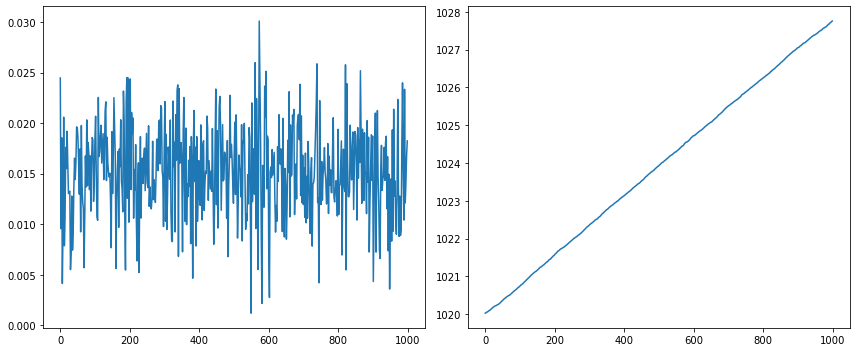

In [110]:
plt.figure(figsize= (12, 5))
plt.subplot(121)
plt.plot(z, N2)

plt.subplot(122)
plt.plot(z, rho)

plt.tight_layout()

In [111]:
T, _ = gsw.CT_from_rho(rho, S, 0)

spice = gsw.spiciness0(S, T)

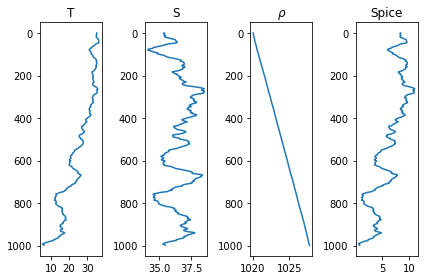

In [112]:
plt.subplot(141)
plt.plot(T, z)
plt.gca().invert_yaxis()
plt.title('T')

plt.subplot(142)
plt.plot(S, z)
plt.gca().invert_yaxis()
plt.title('S')

plt.subplot(143)
plt.plot(rho, z)
plt.gca().invert_yaxis()
plt.title(r'$\rho$')

plt.subplot(144)
plt.plot(spice, z)
plt.gca().invert_yaxis()
plt.title('Spice')


plt.tight_layout()

In [113]:
Taxis= np.linspace(T.min()-2, T.max()+2, 51)
Saxis= np.linspace(S.min()-2, S.max()+2, 51)
Tgrid, Sgrid = np.meshgrid(Taxis, Saxis)

rho_grid=gsw.rho(Sgrid, Tgrid, 0)
spice_grid = gsw.spiciness0(Sgrid, Tgrid)



Text(0, 0.5, 'S')

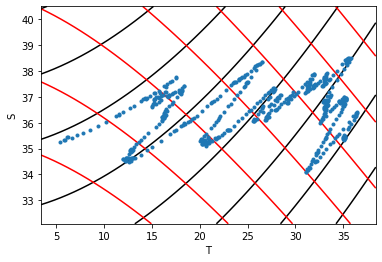

In [114]:
plt.plot(T, S, '.')
plt.contour(Tgrid, Sgrid, rho_grid, colors='k')
plt.contour(Tgrid, Sgrid, spice_grid, colors='r')
plt.xlabel('T')
plt.ylabel('S')

So we created some signal that looks approximately like something we might see in the ocean (atleast in some region with lots of layering). 
- So now can we do filtering or fourier spectra to extract the details? 
- do the details of the waves project onto spiciness? 